In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print("Tensorflow version -->"+str(tf.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import math

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version -->1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
#Now visualizing the shapes of the labels
print("The train images are of shape X--> {} & Y--> {}".format(X_train.shape,Y_train.shape))
print("The test images are of shape X--> {} & Y--> {}".format(X_test.shape,Y_test.shape))

The train images are of shape X--> (60000, 28, 28) & Y--> (60000,)
The test images are of shape X--> (10000, 28, 28) & Y--> (10000,)


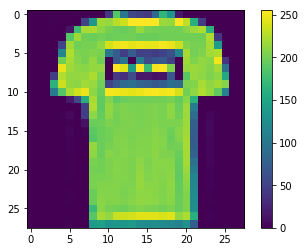

In [4]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)

In [5]:
#Scaling and standardzing the images
from tensorflow.keras.utils import normalize
X_train=normalize(X_train,axis=1)
X_test=normalize(X_test,axis=1)

In [6]:
#Now ddefining the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
tf.keras.layers.Dropout(0.2)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
tf.keras.layers.Dropout(0.2)
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [7]:
#Now defining the parameters which we will use
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 21s 345us/step - loss: 0.4864 - acc: 0.8224
Epoch 2/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.3538 - acc: 0.8691
Epoch 3/100
60000/60000 [==============================] - 12s 195us/step - loss: 0.3176 - acc: 0.8819
Epoch 4/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.2951 - acc: 0.8890
Epoch 5/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.2768 - acc: 0.8957
Epoch 6/100
60000/60000 [==============================] - 14s 234us/step - loss: 0.2600 - acc: 0.9015
Epoch 7/100
60000/60000 [==============================] - 15s 249us/step - loss: 0.2489 - acc: 0.9051
Epoch 8/100
60000/60000 [==============================] - 14s 242us/step - loss: 0.2347 - acc: 0.9104
Epoch 9/100
60000/60000 [==============================] - 15s 242us/step - loss: 0.2249 - acc: 0.9141
Epoch 10/100
60000/60000 [==============================] - 14s 235us/ste

Epoch 79/100
60000/60000 [==============================] - 14s 226us/step - loss: 0.0431 - acc: 0.9846
Epoch 80/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.0400 - acc: 0.9856
Epoch 81/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.0382 - acc: 0.9864
Epoch 82/100
60000/60000 [==============================] - 13s 214us/step - loss: 0.0384 - acc: 0.9859
Epoch 83/100
60000/60000 [==============================] - 13s 222us/step - loss: 0.0378 - acc: 0.9865
Epoch 84/100
60000/60000 [==============================] - 13s 224us/step - loss: 0.0404 - acc: 0.9849
Epoch 85/100
60000/60000 [==============================] - 13s 215us/step - loss: 0.0355 - acc: 0.9871
Epoch 86/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.0355 - acc: 0.9867
Epoch 87/100
60000/60000 [==============================] - 13s 219us/step - loss: 0.0409 - acc: 0.9856
Epoch 88/100
60000/60000 [==============================] - 14s 

In [8]:
val_loss,val_acc=model.evaluate(X_test,Y_test)
print("Testing Loss {} and Accuracy {}".format(val_loss,val_acc))

10000/10000 [==============================] - 1s 116us/step
Testing Loss 0.8590432732835412 and Accuracy 0.8838


9


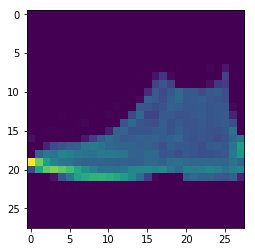

In [10]:
#Saving and loading the model
model.save("Shopping_Category_86_accuracy_no_dropouts")
#Loading the model
new_model=tf.keras.models.load_model("Shopping_Category_86_accuracy_no_dropouts")
prediction=new_model.predict([X_test])
print(np.argmax(prediction[0]))
plt.imshow(X_test[0])